In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport regressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 0: Pre-processing

### Loading the data

Our CSV file is unlabeled, so we create our column names following the description in spambase.DOCUMENTATION:

In [9]:
word_freq_names = [f'word_freq_{i}' for i in range(1, 49)]
char_freq_names = [f'char_freq_{i}' for i in range(1, 7)]
cap_run_attr = ['average', 'longest', 'total']

col_names = (
    word_freq_names +
    char_freq_names +
    ['capital_run_length_' + s for s in cap_run_attr] +
    ['spam']
)

In [10]:
df = pd.read_csv('../data/spambase.data', header=None, names=col_names)
df.head()

,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,word_freq_10,...,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Task 1: Logistic Regression with SGD

In [63]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'src'))

from regressor import LogisticRegressor

In [66]:
model_no_reg = LogisticRegressor()

reg_str = 0.001
model_reg = LogisticRegressor()

learning_curve_no_reg = model_no_reg.fit(learning_curve=True)
learning_curve_reg = model_reg.fit(learning_curve=True)                 

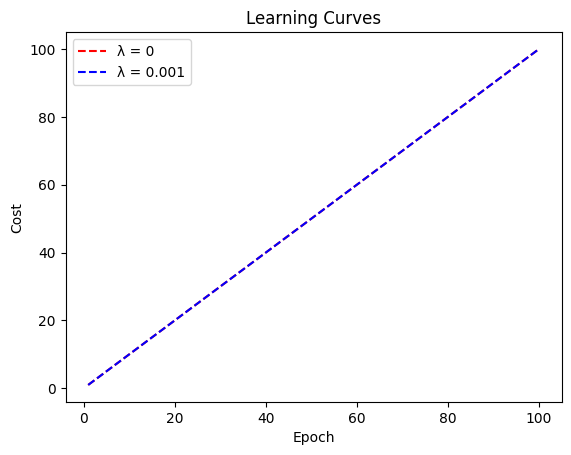

In [68]:
plt.plot(np.arange(1, model_no_reg.num_epochs + 1,), 
            learning_curve_no_reg, 
            'r--', label='\u03BB = 0')
plt.plot(np.arange(1, model_reg.num_epochs + 1),
            learning_curve_reg,
            'b--', label=f'\u03BB = {reg_str}')

plt.xlabel("Epoch") 
plt.ylabel("Cost")
plt.title("Learning Curves")
plt.legend()